## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni
* Blog post URL:TBD


## Description and Use-Case:

Data Source: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?select=aac_intakes_outcomes.csv

The purpose of this project is to examine data from one of Austin's largest animal shelters and build a machine learning model to predict outcomes of animals as they come in and are processed in the system.  An efficient and intelligent model can help "manage the inventory" of the shelter and get animals adopted more quickly or returned to their owners more quickly when applicable.  <br><br>
The outcomes are listed below:
- Transfer           
- Adoption           
- Euthanasia        
- Return to Owner     
- Died                 
- Rto-Adopt
- Missing
- Disposal  <br>

We'll explore these outcomes (as well as the sub categories) in the EDA phase, but with an effective model, we can run the shelter more efficiently leading to happier animals and shelter employees!

Stakeholders: The stakeholders for this project are both the Austin animal shelter and shelters everywhere.  The goal is to bring focus to animals that need to be returned to their owners, and the outcome of this project, the algorithm, can likely be adapted to shelters elsewhere.

Goal: Maximum recall when it comes to the 'return to owner' outcome.  We want to be certain that we are giving maximum exposure to pets that need to be returned to their families.  It is not as crucial to be sure we're making the adoption/transfer process more efficient, though the more adoptions the better!

Success Criteria:
- Easy to understand/use machine learning model
- Easy to implement algorithm
- High recall when it comes to pets that can be returned to families
- General accuracy around 80%


# Importing Libraries:

In [1]:
# Standard Data-sci packages:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm

# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')
# So we can see all columns:
pd.set_option('display.max_columns', None)


/Users/Thomas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Importing Data:

## Main DF:

In [2]:
# Main Dataframe
dfi = pd.read_csv('aac_intakes_outcomes.csv.zip')
display(dfi.head())
dfi.info()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

## Intake Data:

In [3]:
dfii = pd.read_csv('aac_intakes.csv.zip')
dfii.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


We will need to add name to the main DF.

## Combining the DFs:

In [4]:
dfx = dfii[['animal_id', 'name', 'breed']]
df = dfi.set_index('animal_id_intake').join(dfx.set_index('animal_id'), 
                                            rsuffix = '_in', how = 'left')
df['unique_id'] = df['animal_id_outcome'] + df['intake_number'].astype('str')

In [5]:
df = df.drop_duplicates(subset = ['unique_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79636 entries, A006100 to A769067
Data columns (total 43 columns):
age_upon_outcome              79636 non-null object
animal_id_outcome             79636 non-null object
date_of_birth                 79636 non-null object
outcome_subtype               36332 non-null object
outcome_type                  79626 non-null object
sex_upon_outcome              79635 non-null object
age_upon_outcome_(days)       79636 non-null int64
age_upon_outcome_(years)      79636 non-null float64
age_upon_outcome_age_group    79636 non-null object
outcome_datetime              79636 non-null object
outcome_month                 79636 non-null int64
outcome_year                  79636 non-null int64
outcome_monthyear             79636 non-null object
outcome_weekday               79636 non-null object
outcome_hour                  79636 non-null int64
outcome_number                79636 non-null float64
dob_year                      79636 non-null int64
dob_mon

# Cleaning Data:

In [6]:
df.isna().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43304
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake                   1
count                       

## Removing Certain Outcomes:

In [7]:
df.outcome_type.value_counts()

Adoption           33583
Transfer           23791
Return to Owner    14784
Euthanasia          6237
Died                 690
Disposal             301
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

As we can see above, there are a number of outcomes, but my main focus will be on the top three:
- Adoption
- Transfer
- Return to Owner
<br>


While there were a number of animals that were euthanized or died, I will not include these rows in the model (either in training or testing).

This is a no-kill shelter, and euthanasia is a last resort.  I will not build a model that will recommend it as an outcome in any case based on innocuous features such as breed or age.  If it is necessary to euthanize an animal for health reasons, this will be obvious upon intake (massive injury or illness).  We do not need a more general machine learning model for this. 

In [8]:
df = df[df['outcome_type'].isin(['Adoption', 'Transfer', 'Return to Owner'])]
df['outcome_type'].value_counts()

Adoption           33583
Transfer           23791
Return to Owner    14784
Name: outcome_type, dtype: int64

## Animal Type:

There are too few birds or other animals to accurately model, so I'm going to focus my efforts on dogs and cats!

In [9]:
df = df[df.animal_type != 'Bird']
df = df[df.animal_type != 'Other']
df.animal_type.value_counts()

Dog    43538
Cat    27568
Name: animal_type, dtype: int64

## Name: 

In [10]:
df.name.isna().sum()

18264

I think the simplest option here is has name or does not have name.  I would also be interested about less common or longer names.  Perhaps that indicates more involved owners.  Who knows!

In [11]:
df.name.fillna(0, inplace = True)
df['has_name'] = df['name'].map(lambda x: 1 if not x == 0 else 0)

In [12]:
# Seems to be working!
df['has_name'].value_counts()

1    52842
0    18264
Name: has_name, dtype: int64

In [13]:
df['outcome_type'].isna().sum()

0

## Sex Upon Outcome:

In [14]:
df.sex_upon_outcome.dropna(inplace = True)

In [15]:
df.sex_upon_outcome.value_counts()

Neutered Male    27366
Spayed Female    24900
Intact Male       8227
Intact Female     8135
Unknown           2477
Name: sex_upon_outcome, dtype: int64

## Sex Upon Intake:

For now, I'll be keeping the unknown sex animals as unknown.  The uncertainty may provide valuable insight when it comes to the ultimate outcome.  For example, it's possible that when the sex is unknown, the animal is more likely to be adopted.  Getting rid of unknown as a classification would muddy this process.

In [16]:
df['sex_upon_intake'].fillna('Unknown', inplace = True)

In [17]:
df.sex_upon_intake.value_counts()

Intact Male      23618
Intact Female    22387
Neutered Male    11975
Spayed Female    10648
Unknown           2478
Name: sex_upon_intake, dtype: int64

## Choosing Columns for Main DF:

These are the most relevant features when it comes to intake and how long the animal spends in the shelter.  With this data, we should be able to build a machine learning model to predict animal outcomes.  For now, let's focus on exploratory data analysis, though!

In [18]:
col_to_keep = ['sex_upon_intake', 'age_upon_intake_(years)', 
               'time_in_shelter_days','animal_type', 'breed',
               'color', 'found_location', 'intake_condition', 
               'intake_type', 'intake_number', 'has_name',
               'outcome_datetime', 'outcome_type']
df_eda = df[col_to_keep]
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71106 entries, A006100 to A769066
Data columns (total 13 columns):
sex_upon_intake            71106 non-null object
age_upon_intake_(years)    71106 non-null float64
time_in_shelter_days       71106 non-null float64
animal_type                71106 non-null object
breed                      71106 non-null object
color                      71106 non-null object
found_location             71106 non-null object
intake_condition           71106 non-null object
intake_type                71106 non-null object
intake_number              71106 non-null float64
has_name                   71106 non-null int64
outcome_datetime           71106 non-null object
outcome_type               71106 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 7.6+ MB


# EDA:

In [19]:
df_eda.head(2)

,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,animal_type,breed,color,found_location,intake_condition,intake_type,intake_number,has_name,outcome_datetime,outcome_type
A006100,Neutered Male,10.0,0.588194,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,1.0,1,2017-12-07 14:07:00,Return to Owner
A006100,Neutered Male,7.0,1.259722,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,2.0,1,2014-12-20 16:35:00,Return to Owner


## Different Outcome Types:

Here, I'll be preparing different dataframes that separate the data by Cat or Dog, and group by sex, intake type, and intake condition.  This will make pulling up the charts below a bit easier.

In [20]:
eda_dog = df_eda[df_eda.animal_type == 'Dog']
eda_cat = df_eda[df_eda.animal_type == 'Cat']
eda_dog = df_eda[df_eda.animal_type == 'Dog']
eda_cat = df_eda[df_eda.animal_type == 'Cat']
###
# Dogs:
eda_dogii = pd.get_dummies(eda_dog['outcome_type'])
eda_dogii = pd.concat([eda_dog, eda_dogii], axis = 1)
# Cats:
eda_catii = pd.get_dummies(eda_cat['outcome_type'])
eda_catii = pd.concat([eda_cat, eda_catii], axis = 1)
###
cond_cols = ['intake_condition', 'Transfer', 'Return to Owner', 'Adoption']
type_cols = ['intake_type', 'Transfer', 'Return to Owner', 'Adoption']
sex_cols = ['sex_upon_intake', 'Transfer', 'Return to Owner', 'Adoption']
# Dogs:
dog_cond = eda_dogii[cond_cols]
dog_type = eda_dogii[type_cols]
dog_sex = eda_dogii[sex_cols]
# Cats:
cat_cond = eda_catii[cond_cols]
cat_type = eda_catii[type_cols]
cat_sex = eda_catii[sex_cols]
# Dogs:
dog_cond = dog_cond.groupby('intake_condition').sum()
dog_type = dog_type.groupby('intake_type').sum()
dog_sex = dog_sex.groupby('sex_upon_intake').sum()
# Cats:
cat_cond = cat_cond.groupby('intake_condition').sum()
cat_type = cat_type.groupby('intake_type').sum()
cat_sex = cat_sex.groupby('sex_upon_intake').sum()

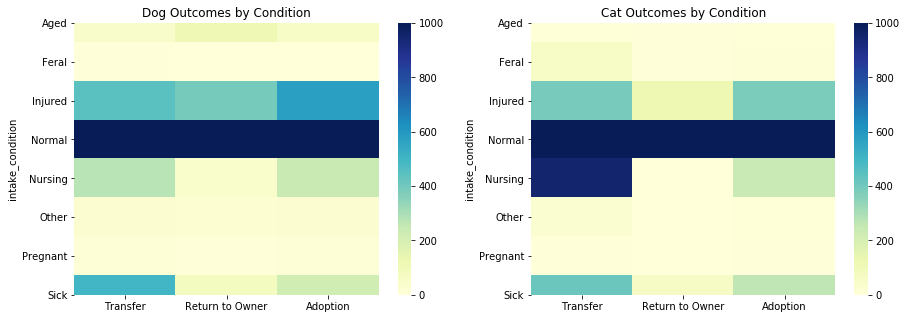

In [21]:
# Conditions:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.heatmap(dog_cond, cmap="YlGnBu", vmax = 1000)
ax1.set_title('Dog Outcomes by Condition')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(cat_cond, cmap="YlGnBu", vmax = 1000)
ax2.set_title('Cat Outcomes by Condition');

No major findings here.  Cats and Dogs are very similar when it comes to outcome based on intake condition, though many more cats in the nursing category get transfered.  It's likely these are kittens being transfered to foster homes.

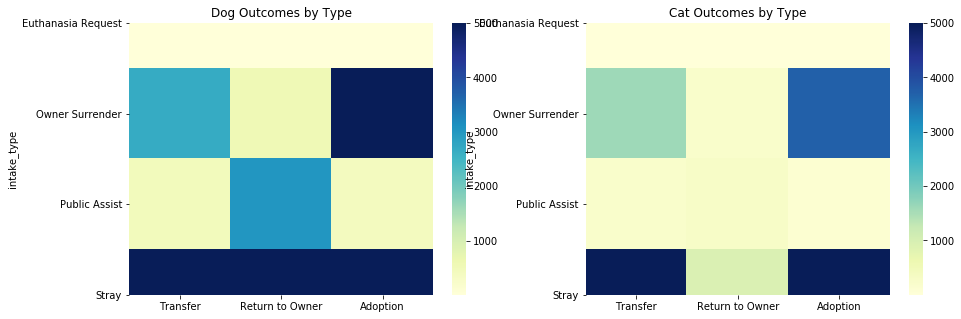

In [22]:
# Types:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.heatmap(dog_type, cmap="YlGnBu", vmax = 5000)
ax1.set_title('Dog Outcomes by Type')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(cat_type, cmap="YlGnBu", vmax = 5000)
ax2.set_title('Cat Outcomes by Type');

Here, we see that many more public assist dogs are returned to their owners.  The Euthanasia Request bar is rather blank, but this is likely because we have removed the euthanasia outcome.  It's great to see that at least some of these euthanasia request animals get a second chance, though!

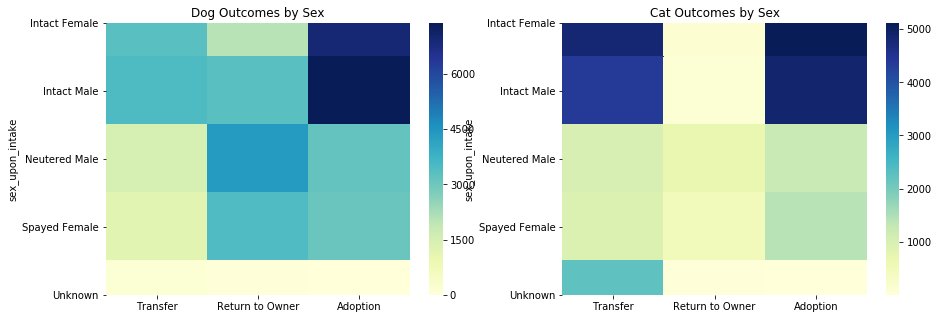

In [23]:
# Sex:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.heatmap(dog_sex, cmap="YlGnBu")
ax1.set_title('Dog Outcomes by Sex')

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(cat_sex, cmap="YlGnBu")
ax2.set_title('Cat Outcomes by Sex');

There's a bit to unpack here, but it's interesting that we see a small concentration of unknown sex cats being transfered out. Other than that, we see the highest concentration of intact male and female dogs being adopted, though the number is also high for intact male and female cats being transfered.

## Time Series:

In [24]:
timedf = pd.to_datetime(df.outcome_monthyear)
timedf = pd.DataFrame(timedf)
timedf = pd.concat([timedf, df.animal_type, df.outcome_type, 
                    df.outcome_subtype], axis = 1)

outcome_dums = pd.get_dummies(timedf['outcome_type'])
timedf = pd.concat([timedf, outcome_dums], axis = 1)

timedf_cat = timedf[timedf.animal_type == 'Cat']
timedf_dog = timedf[timedf.animal_type == 'Dog']

# Grouping by time
timedf_cat = timedf_cat.groupby('outcome_monthyear').sum()
timedf_dog = timedf_dog.groupby('outcome_monthyear').sum()

In [25]:
timedf_cat.head()

,Adoption,Return to Owner,Transfer
outcome_monthyear,,,
2013-10-01,71.0,7.0,214.0
2013-11-01,150.0,28.0,153.0
2013-12-01,231.0,19.0,211.0
2014-01-01,136.0,38.0,143.0
2014-02-01,93.0,25.0,120.0


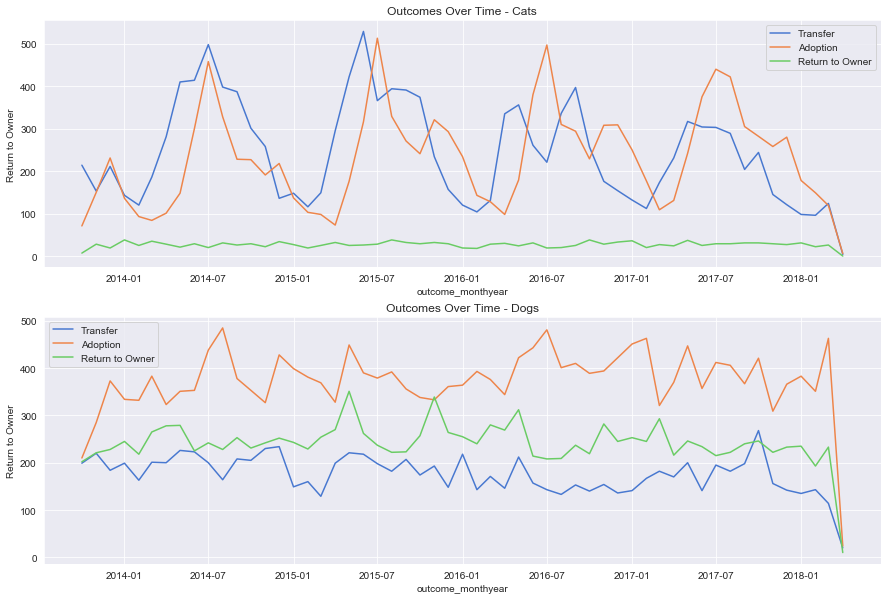

In [26]:
sns.set_style('darkgrid')
sns.set_palette("muted")
outcomes = ['Transfer', 'Adoption', 'Return to Owner']
plt.figure(figsize=(15, 10))

for outcome in outcomes:
    ax1 = plt.subplot(2, 1, 1)
    ax1 = sns.lineplot(data = timedf_cat.reset_index(), 
                       x = 'outcome_monthyear', y = outcome)
    ax1.set_title('Outcomes Over Time - Cats')
    plt.legend(['Transfer', 'Adoption', 'Return to Owner'])

for outcome in outcomes:
    ax1 = plt.subplot(2, 1, 2)
    ax1 = sns.lineplot(data = timedf_dog.reset_index(), 
                       x = 'outcome_monthyear', y = outcome)
    ax1.set_title('Outcomes Over Time - Dogs');
    plt.legend(['Transfer', 'Adoption', 'Return to Owner']);

There are two interesting points here:<br>
1: Many more dogs are returned to owners vs cats.  In fact, for dogs, it's the second highest category whereas for cats, it's the lowest frequency outcome.<br>
2: There is a strong seasonality component to cats being adopted or transfered whereas for dogs, and all return to owner outcomes, it's relatively constant throughout the year.  This makes sense as cats and dogs can run away all the time, but it seems as though people are more likely to adopt cats in the summer.  It's interesting that we do not see the same seasonality for dogs, though!

# Feature Engineering:

Now it's time to transform the data into a format that feeds better into the machine learning algorithms.  For this we'll need dummy variables for many of the categorical data columns such as color or breed.

In [27]:
dfi = df_eda
dfi.head()

,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,animal_type,breed,color,found_location,intake_condition,intake_type,intake_number,has_name,outcome_datetime,outcome_type
A006100,Neutered Male,10.0,0.588194,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,1.0,1,2017-12-07 14:07:00,Return to Owner
A006100,Neutered Male,7.0,1.259722,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,2.0,1,2014-12-20 16:35:00,Return to Owner
A006100,Neutered Male,6.0,1.113889,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,3.0,1,2014-03-08 17:10:00,Return to Owner
A047759,Neutered Male,10.0,4.970139,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,1.0,1,2014-04-07 15:12:00,Transfer
A134067,Neutered Male,16.0,0.119444,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,1.0,1,2013-11-16 11:54:00,Return to Owner


In [28]:
# sex_upon_intake
# Dummy variable, no change
dfi['sex'] = np.where(dfi['sex_upon_intake'].str.contains('Male'), 1, 0)
dfi['intact'] = np.where(dfi['sex_upon_intake'].str.contains('Intact'), 1, 0)
dfi['unk_sex'] = np.where(dfi['sex_upon_intake'].str.contains('Unknown'), 1, 0)
#dfi.drop(columns = 'sex_upon_intake', axis = 1, inplace = True)

In [29]:
# age_upon_intake_(years)
# Will be scaled in model

In [30]:
# time_in_shelter_days 
# Will be scaled in model

In [31]:
# animal_type 
# Dummy for dog or cat
dfi['dog'] = dfi['animal_type'].map(lambda x: 1 if x == 'Dog' else 0)
dfi['cat'] = dfi['animal_type'].map(lambda x: 1 if x == 'Cat' else 0)

Below, I'll be using a function that will be handy for columns such as 'breed', where there are over 500 unique values.  The function, 'dum_sign', takes the column and creates dummy variables for categories that meet a certain specified frequency threshold.  <br><br>
After creating the dummy variables, I use the concat function from Pandas to connect it back to the main dataframe.

My goal for this function is to have between 5-10 new columns for each of this categorical columns.  The remaining categories are re-categorized as 'Other'.

In [32]:
# breed
# Dummy for top 20
def dum_sign(dummy_col, threshold=0.1):
    # removes the bind
    dummy_col = dummy_col.copy()
    # Ratio of dummy to rest of column
    count = pd.value_counts(dummy_col) / len(dummy_col)
    # Condition
    mask = dummy_col.isin(count[count > threshold].index)
    # Replaces 
    dummy_col[~mask] = "others"

    return pd.get_dummies(dummy_col, prefix=dummy_col.name)

df_breed = dum_sign(dfi['breed'], threshold = .01)
dfi = pd.concat([dfi, df_breed], axis = 1)

In [33]:
# color
# Dummy for top 10-20
df_col = dum_sign(dfi['color'], threshold = .025)
dfi = pd.concat([dfi, df_col], axis = 1)

In [34]:
# found_location
df_loc = dum_sign(dfi['found_location'], threshold = .01)
dfi = pd.concat([dfi, df_loc], axis = 1)

In [35]:
# intake_condition
# Regular dummy variables
cond_dummy = pd.get_dummies(dfi['intake_condition'])
dfi = pd.concat([dfi, cond_dummy], axis = 1)

In [36]:
# intake_type         
# Regular dummy variables
int_type_dummy = pd.get_dummies(dfi['intake_type'])
dfi = pd.concat([dfi, int_type_dummy], axis = 1)

In [37]:
# intake_number
# Dummy for 1, 2, 3, and 4+
dfi['count_1'] = dfi['intake_number'].map(lambda x: 1 if x == 1 else 0)
dfi['count_2'] = dfi['intake_number'].map(lambda x: 1 if x == 2 else 0)
dfi['count_3'] = dfi['intake_number'].map(lambda x: 1 if x == 3 else 0)
dfi['count_4_plus'] = dfi['intake_number'].map(lambda x: 1 if x > 3 else 0)

In [38]:
# has_name               
# Good to go

In [39]:
# outcome_type  
# Return to Owner = 1
# Transfer = 2
# Adoption = 3
dfi['outcome'] = dfi['outcome_type'].map(lambda x: 1 if x == 'Return to Owner' 
                                         else (2 if x == 'Transfer' 
                                               else 3))

# Predictor Variables:

There are quite a few variables to dig through in the main data frame, but here are the main predictor variables we'll be using for our model:
1. Sex (This one is interesting as it has neutered/spayed vs intact as well as biological sex)
2. Age on intake
3. Time in shelter
4. Animal type (Cats, dogs, birds, or other!)
5. Breed (Categorical variable hell)
6. Color(Categorical variable hell)
7. Found location (We'll need to split this up into a few main areas)
8. Intake condition (Sick, healthy, aged, feral, etc. . . )
9. Intake type (Public assist, Stray, owner abandonment, etc. . . )
10. Count (How many times has this animal been in the shelter)
11. Has name ( . . . upon intake)
12. Outcome day/time (maybe more adoptions happen on weekend. . .)

# Train Test Split:

## Regular Split:

In [40]:
# Putting the final DF back together:

# X vs y:
X = dfi.drop(['outcome', 'outcome_type', 'sex_upon_intake',
              'animal_type', 'breed', 'color', 'found_location', 
              'intake_condition', 'intake_type',
              'intake_number', 'outcome_datetime'], axis = 1)
y = dfi['outcome']
# Splitting the data.  Test size 20%.  Random_state 123
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state = 123)
print(len(X_train), len(X_test), len(y_train), len(y_test))


56884 14222 56884 14222


## SMOTE Split:

As there is a huge imbalance between outcome types, we'll be using the SMOTE method to balance the outcomes so that each one has equal weight.  This will lead to 'Adoption', the most common outcome, not being biased in the model.

In [41]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

# Preview resampled sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 



3    26569
2    26569
1    26569
dtype: int64


# Baseline Model (KNN):

## Accuracy Metrics:

In [42]:
def adopt_recall(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[2,2]
    fn1 = x1[0,2]
    fn2 = x1[1,2]
    total = fn1 + fn2 + tp
    adopt_recall = tp/total
    print("Adoption Recall: {:.4}%".format(adopt_recall * 100))

def rto_recall(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    x1 = confusion_matrix(y_test, val_preds)
    #return x1
    tp = x1[0,0]
    fn1 = x1[1,0]
    fn2 = x1[2,0]
    total = fn1 + fn2 + tp
    rto_recall = tp/total
    print("Return to Owner Recall: {:.4}%".format(rto_recall * 100))
    
def norm_matrix(model):
    y_pred = model.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, 
                                        figsize=(5,5), 
                                        normalize=True)
    plt.yticks([-.5, 2.5])

def show_accuracy(model):
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)

    print("Training data accuracy: {:.5}%".format(training_accuracy * 100))
    print("Testing data accuracy: {:.5}%".format(val_accuracy * 100))
#    print("--------------------------------")
#    print("--RTO----T----A-----------------")
#    print(confusion_matrix(y_test, val_preds))
    
    norm_matrix(model)
    rto_recall(model)
    
def plot_feature_importances(model):
    sorted_features = np.sort(model.feature_importances_)
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

For our baseline model, we'll be using a basic K Nearest Neighbors model, and see if we can improve it from there.<br>
Note, this will likely be commented out as it is a slow model to run.

In [43]:
#KNN Pipeline:

#knn_pipe = Pipeline([('ss', StandardScaler()), 
#                     ('knn', KNeighborsClassifier(n_neighbors=10))])

#knn_pipe.fit(X_train, y_train)

In [44]:
#show_accuracy(knn_pipe)

In [45]:
'''
Training data accuracy: 75.888%
Testing data accuracy: 70.173%
Return to Owner Recall: 72.75%
'''
# Not great performance.  Let's try to improve this!

'\nTraining data accuracy: 75.888%\nTesting data accuracy: 70.173%\nReturn to Owner Recall: 72.75%\n'

# Improved Models:

## Decision Tree:

In [46]:
grid = [{'gridtree__max_depth': [18, 19, 20], 
         'gridtree__min_samples_leaf': [1, 2, 3]}]

tree = Pipeline([('ss', StandardScaler()), 
                ('gridtree', DecisionTreeClassifier(class_weight='balanced',
                                                    random_state = 123))])

tree_grid = GridSearchCV(estimator = tree, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

{'gridtree__max_depth': 18, 'gridtree__min_samples_leaf': 1}

### SMOTE Decision Tree:

In [47]:
grid = [{'gridtree__max_depth': [18, 19, 20], 
         'gridtree__min_samples_leaf': [1, 2, 3]}]

tree = Pipeline([('ss', StandardScaler()), 
                ('gridtree', DecisionTreeClassifier(random_state = 123))])

tree_grid = GridSearchCV(estimator = tree, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
tree_grid.fit(X_train_resampled, y_train_resampled)
tree_grid.best_params_

{'gridtree__max_depth': 18, 'gridtree__min_samples_leaf': 1}

Training data accuracy: 85.76%
Testing data accuracy: 77.029%
Return to Owner Recall: 85.25%


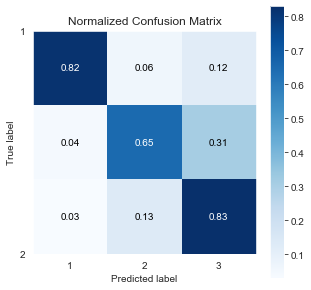

In [48]:
show_accuracy(tree_grid)

Training data accuracy: 80.291%
Testing data accuracy: 79.215%
Return to Owner Recall: 92.39%


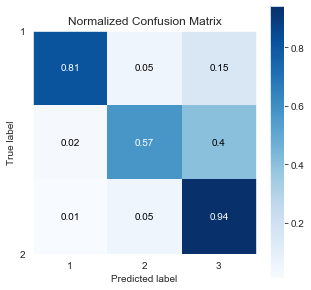

In [49]:
# Tree for Feature Importance:
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
show_accuracy(tree)

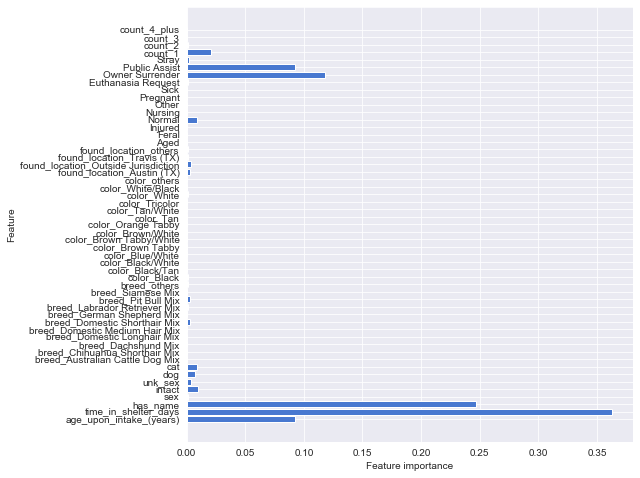

In [50]:
plot_feature_importances(tree)

In [74]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

Training data accuracy: 80.291%
Testing data accuracy: 79.194%
Return to Owner Recall: 92.28%


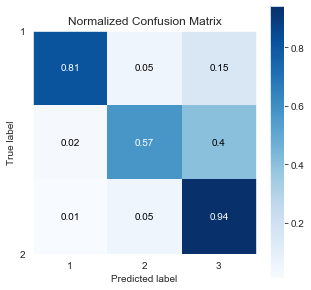

In [76]:
tree2 = DecisionTreeClassifier(max_depth = 10)
tree2.fit(X_train, y_train)
show_accuracy(tree2)

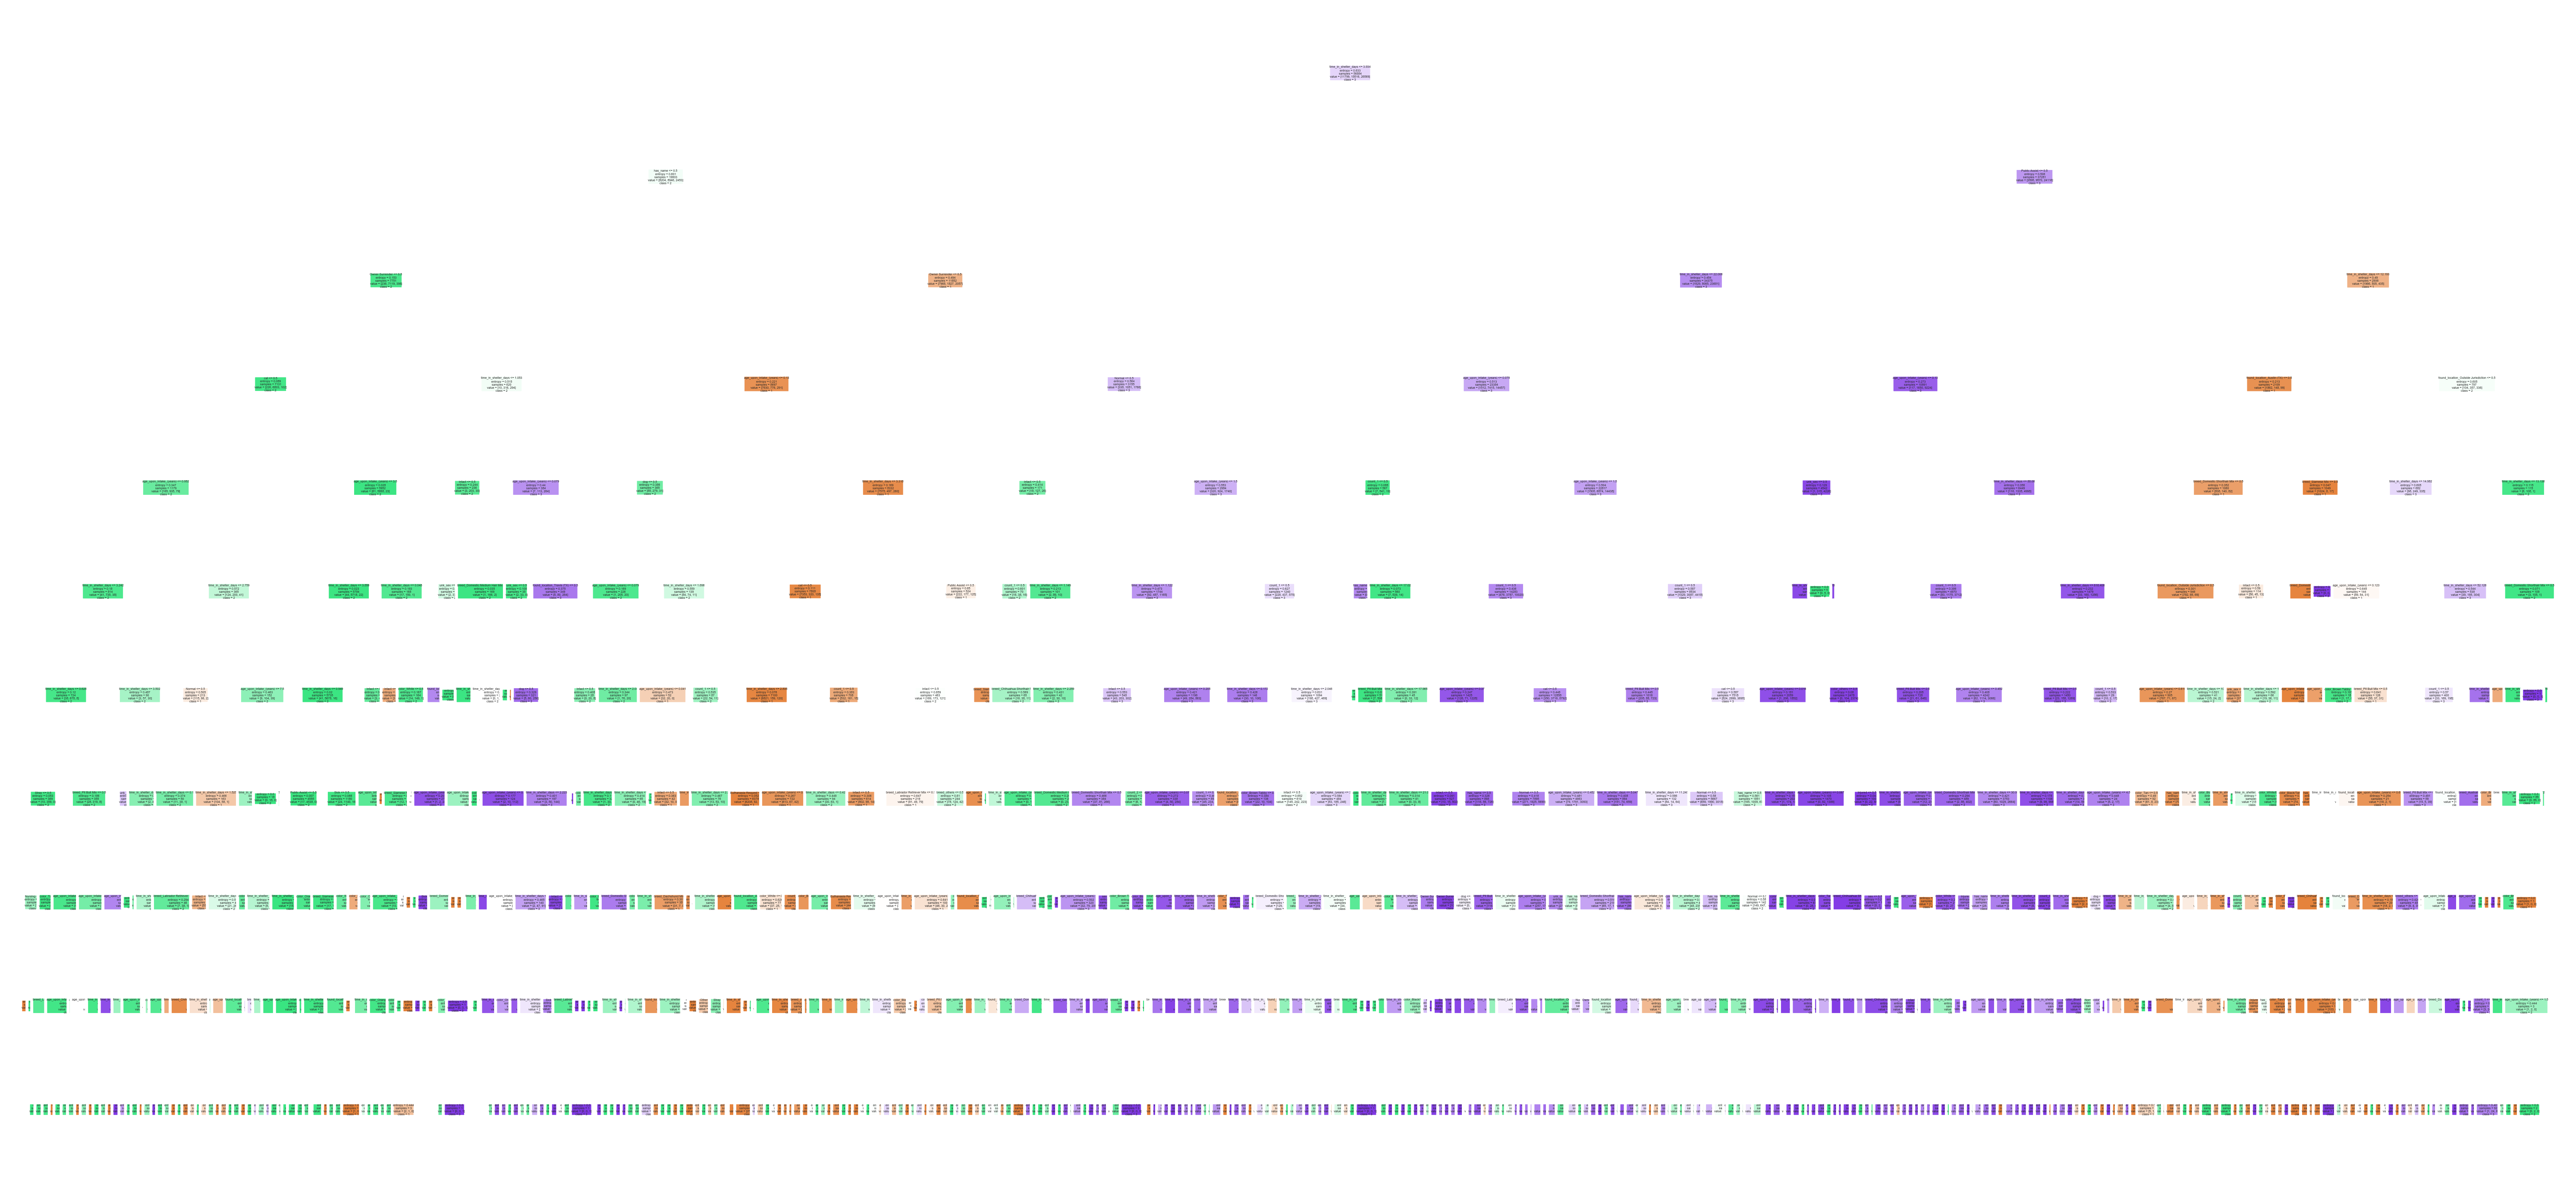

In [81]:
plt.figure(figsize=(15,7), dpi = 500)
tree.plot_tree(tree2, feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

## Random Forest (SMOTE):

In [51]:
# Get feature importance bar chart
forest = Pipeline([('ss', StandardScaler()), 
                   ('forest', RandomForestClassifier(
                     n_estimators=150, 
                     max_depth= 20,
                     min_samples_leaf = 1, 
                     random_state = 123))])

forest.fit(X_train_resampled, y_train_resampled)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=20,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

Training data accuracy: 87.376%
Testing data accuracy: 79.328%
Return to Owner Recall: 90.78%


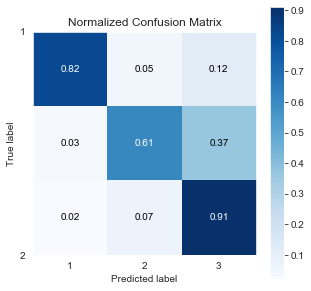

In [52]:
show_accuracy(forest)

Notes: getting most of the return to owner correct, which is good. <br>
Gets caught between actual transfers vs thinking they get adopted <br>
Gets most of the adopted with some spill over <br>
Maybe a balancing issue? <br>
1 = return to owner <br>
2 = transfer <br>
3 = adoption <br>
A bit overfit all in all. . . 


In [53]:
# Forest for Feature Importance
forest2 = RandomForestClassifier(n_estimators=150, 
                     max_depth= 20,
                     min_samples_leaf = 1, 
                     random_state = 123)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

Training data accuracy: 87.796%
Testing data accuracy: 79.581%
Return to Owner Recall: 92.77%


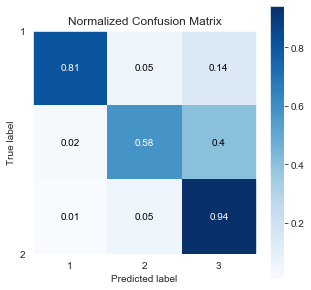

In [54]:
show_accuracy(forest2)

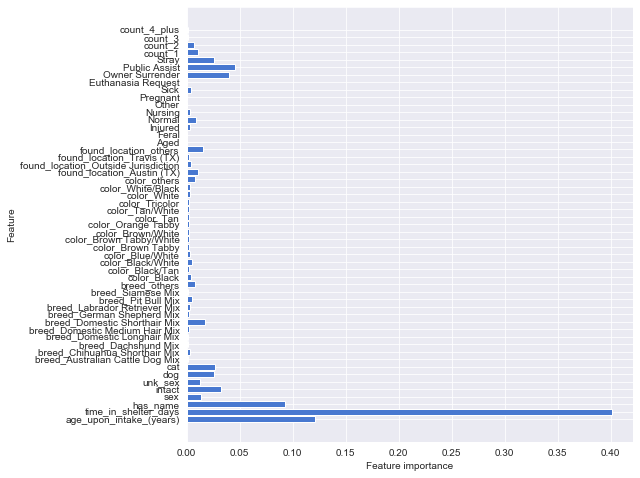

In [55]:
plot_feature_importances(forest2)

## Random Forest with Grid Search:

In [56]:
'''
grid = [{'RF__max_depth': [16, 17, 18], 
         'RF__min_samples_split': [2], 
         'RF__min_samples_leaf': [1]}]

forest_2 = Pipeline([('ss', StandardScaler()),
                     ('RF', RandomForestClassifier(n_estimators=150,
                                                   class_weight= 'balanced',
                                                   random_state = 123))])

grid_forest = GridSearchCV(estimator = forest_2, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
grid_forest.fit(X_train, y_train)
grid_forest.best_params_
'''

"\ngrid = [{'RF__max_depth': [16, 17, 18], \n         'RF__min_samples_split': [2], \n         'RF__min_samples_leaf': [1]}]\n\nforest_2 = Pipeline([('ss', StandardScaler()),\n                     ('RF', RandomForestClassifier(n_estimators=150,\n                                                   class_weight= 'balanced',\n                                                   random_state = 123))])\n\ngrid_forest = GridSearchCV(estimator = forest_2, \n                          param_grid = grid, \n                          scoring = 'accuracy', \n                          cv=5)\ngrid_forest.fit(X_train, y_train)\ngrid_forest.best_params_\n"

In [57]:
#show_accuracy(grid_forest)

## ADA Boost:

In [58]:
# Model:
'''
grid = [{'adab__learning_rate': [.5, .1], 
         'adab__n_estimators': [100, 200]}]

ada = Pipeline([('ss', StandardScaler()), 
                ('adab', AdaBoostClassifier(random_state = 123))])

grid_ada = GridSearchCV(estimator = ada, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
grid_ada.fit(X_train, y_train)
grid_ada.best_params_
'''

"\ngrid = [{'adab__learning_rate': [.5, .1], \n         'adab__n_estimators': [100, 200]}]\n\nada = Pipeline([('ss', StandardScaler()), \n                ('adab', AdaBoostClassifier(random_state = 123))])\n\ngrid_ada = GridSearchCV(estimator = ada, \n                          param_grid = grid, \n                          scoring = 'accuracy', \n                          cv=5)\ngrid_ada.fit(X_train, y_train)\ngrid_ada.best_params_\n"

In [59]:
# Scoring:
#show_accuracy(grid_ada)
# Didn't seem to love ada
# Results, 74% accuracy train and test

## Gradient Boost:

In [60]:
# Model: GradientBoostingClassifier
'''
grid = [{'gridb__learning_rate': [.05, .1], 
         'gridb__n_estimators': [50, 100]}]

grad = Pipeline([('ss', StandardScaler()), 
                ('gridb', GradientBoostingClassifier(random_state = 123))])

grad_grid = GridSearchCV(estimator = grad, 
                          param_grid = grid, 
                          scoring = 'accuracy', 
                          cv=5)
grad_grid.fit(X_train, y_train)
grad_grid.best_params_
'''

"\ngrid = [{'gridb__learning_rate': [.05, .1], \n         'gridb__n_estimators': [50, 100]}]\n\ngrad = Pipeline([('ss', StandardScaler()), \n                ('gridb', GradientBoostingClassifier(random_state = 123))])\n\ngrad_grid = GridSearchCV(estimator = grad, \n                          param_grid = grid, \n                          scoring = 'accuracy', \n                          cv=5)\ngrad_grid.fit(X_train, y_train)\ngrad_grid.best_params_\n"

In [61]:
# Scoring:
#show_accuracy(grad_grid)
# Taking too long

## XG Boost:

Faster Model, no pipeline:

In [70]:
#xg = xgb.XGBClassifier(learning_rate = .1, max_depth = 8, n_estimators = 150)
#xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training data accuracy: 83.454%
Testing data accuracy: 80.34%
Return to Owner Recall: 92.25%


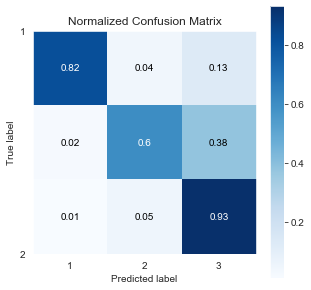

In [71]:
#show_accuracy(xg)

In [64]:
'''
Training data accuracy: 83.454%
Testing data accuracy: 80.34%
Return to Owner Recall: 92.25%
--------------------------------
--RTO----T----A-----------------
[[2416  132  390]
 [ 109 2782 1717]
 [  92  362 6222]]
 '''

'\nTraining data accuracy: 83.454%\nTesting data accuracy: 80.34%\n--------------------------------\n--RTO----T----A-----------------\n[[2416  132  390]\n [ 109 2782 1717]\n [  92  362 6222]]\n '

Gridsearch Option:

In [65]:
'''
grid = [{'xgb__learning_rate': [.05, .3], 
         'xgb__max_depth': [6, 9]}]

xg_pipe = Pipeline([('ss', StandardScaler()), 
                    ('xgb', xgb.XGBClassifier( n_estimators = 150,
                                          random_state = 123))])

xg_grid = GridSearchCV(estimator = xg_pipe, param_grid = grid, 
                       scoring = 'accuracy', cv=5)

xg_grid.fit(X_train, y_train)
'''

"\ngrid = [{'xgb__learning_rate': [.05, .3], \n         'xgb__max_depth': [6, 9]}]\n\nxg_pipe = Pipeline([('ss', StandardScaler()), \n                    ('xgb', xgb.XGBClassifier( n_estimators = 150,\n                                          random_state = 123))])\n\nxg_grid = GridSearchCV(estimator = xg_pipe, param_grid = grid, \n                       scoring = 'accuracy', cv=5)\n\nxg_grid.fit(X_train, y_train)\n"

In [66]:
#show_accuracy(xg_grid)

In [67]:
#xg_grid.best_params_

## SVM:

In [68]:
# Taking too long to run for now.
#clf = svm.SVC(kernel='poly', coef0=2 , gamma=1)
#clf.fit(X_train, y_train) 

In [69]:
#show_accuracy(clf)

# Final Model:

The final model we have chosen 

## Feature Importance:

# Model Comparisons:

## Confusion Matrix:

## F1 vs Accuracy vs Recall etc. . . 

# Conclusion:

This exercise in model building has been quite informative.  While pets returned to owners are the smallest of the main groups, it's crucial they get the attention they need instead of being transfered out or adopted to another family.<br><br>

Pets that are the most likely to have their families looking for them should be put front and center on the website so families can find them easily.  Pets likely to be adopted should be a close second.  On top of that, we can improve data collection in the future to improve the model.  There are a few major areas that could help:
- Change color upon intake to one of 15 or so values instead of an arbitrarily chosen color.  This has resulted in over 500 different colors recorded in the dataset.
- Change location data to longitude and latitude data.  This makes it much easier to compare locations.  It can also help when implementing maps on the site.
- Change breeds to a more standardized list as well.

Overall, though, this model should help the vast majority of pets find their way to owners.  With some work on the website and internal database applications, we can set up a system to help animals find their homes!

Thanks for reading,

-Thomas Brown